# AppLaunched Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv(r"../data/AppLaunched.csv")
data1.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,a27134c322d4f56dabc106a6847cb96b,20170106,0,4,50,1,1,2
1,aab39ad0874c59cc388525d511667f9d,20170106,0,8,40,1,1,2
2,f717dc3f757dc18cc0c3f27ed3e94ef8,20170106,0,12,35,1,1,2
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,20170106,0,20,40,1,2,2
4,71f05822bb699a04b694dd30265fdf73,20170106,0,20,35,1,1,2


# Shape of dataset

In [2]:
data1.shape

(2716093, 8)

# value count countrywise

In [3]:
import seaborn as sns
%matplotlib inline
data1['Country'].value_counts().head(5)

1      1970961
40      626322
255      95174
14        7823
46        3361
Name: Country, dtype: int64

# Plot for country count

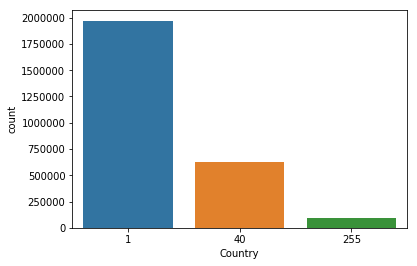

In [4]:
data1 = data1[data1.Country.isin([1,40,255])]
sns.countplot(data1['Country'])

In [5]:
data1['Date'] = data1['Date'].apply(lambda x:str(x)[0:4]+str('/') + str(x)[4:6] + str('/') + str(x)[6:8])
data1['Date'] = pd.to_datetime(data1['Date'])
data1.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,a27134c322d4f56dabc106a6847cb96b,2017-01-06,0,4,50,1,1,2
1,aab39ad0874c59cc388525d511667f9d,2017-01-06,0,8,40,1,1,2
2,f717dc3f757dc18cc0c3f27ed3e94ef8,2017-01-06,0,12,35,1,1,2
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-06,0,20,40,1,2,2
4,71f05822bb699a04b694dd30265fdf73,2017-01-06,0,20,35,1,1,2


In [6]:
data1['Start_Time_hr'] = data1['Minute_Of_Day']//60
data1['Start_Time_min'] = data1['Minute_Of_Day']%60
data1['Start_Time_sec'] = data1['Second']
data1 = data1.drop(columns = 'Minute_Of_Day')
data1 = data1.drop(columns = 'Second')
data1['Start_Time_hr'] = data1['Start_Time_hr'].apply(lambda x: str(x).zfill(2))
data1['Start_Time_min'] = data1['Start_Time_min'].apply(lambda x: str(x).zfill(2) )
data1['Start_Time_sec'] =data1['Start_Time_sec'].apply(lambda x: str(x).zfill(2))
data1['time'] = data1['Start_Time_hr'] + str(':') + data1['Start_Time_min'] + str(':') + data1['Start_Time_sec']
data1 = data1.drop(columns = ['Start_Time_hr','Start_Time_min','Start_Time_sec'])
data1.head(5)

,UserId,Date,State,Country,Device,OS,time
0,a27134c322d4f56dabc106a6847cb96b,2017-01-06,50,1,1,2,00:00:04
1,aab39ad0874c59cc388525d511667f9d,2017-01-06,40,1,1,2,00:00:08
2,f717dc3f757dc18cc0c3f27ed3e94ef8,2017-01-06,35,1,1,2,00:00:12
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-06,40,1,2,2,00:00:20
4,71f05822bb699a04b694dd30265fdf73,2017-01-06,35,1,1,2,00:00:20


# Combining columns

In [8]:
data1['Country-State']= data1['Country'].apply(lambda x:str(x)) + str('-') + data1['State'].apply(lambda x : str(x))
data1['Device-OS']= data1['Device'].apply(lambda x:str(x)) + str('-') + data1['OS'].apply(lambda x : str(x))
data1.head(5)

,UserId,Date,State,Country,Device,OS,time,Country-State,Device-OS
0,a27134c322d4f56dabc106a6847cb96b,2017-01-06,50,1,1,2,00:00:04,1-50,1-2
1,aab39ad0874c59cc388525d511667f9d,2017-01-06,40,1,1,2,00:00:08,1-40,1-2
2,f717dc3f757dc18cc0c3f27ed3e94ef8,2017-01-06,35,1,1,2,00:00:12,1-35,1-2
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-06,40,1,2,2,00:00:20,1-40,2-2
4,71f05822bb699a04b694dd30265fdf73,2017-01-06,35,1,1,2,00:00:20,1-35,1-2


# Trend analysis of App Launched

In [11]:
data1['Date'].dt.month.value_counts(ascending = True)


2    314695
3    318982
6    319132
1    408194
4    535722
5    795732
Name: Date, dtype: int64

Text(0, 0.5, 'Count')

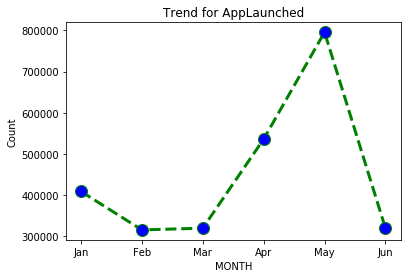

In [12]:
plt.plot(['Jan','Feb','Mar','Apr','May','Jun'], [408194,314695,318982,535722,795732,319132], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.title('Trend for AppLaunched')
plt.xlabel('MONTH')
plt.ylabel('Count')

# For Country 1

In [13]:
data1[data1.Country == 1]['Date'].dt.month.value_counts()

5    593840
4    387127
1    289863
6    253048
3    234052
2    213031
Name: Date, dtype: int64

Text(0, 0.5, 'Count')

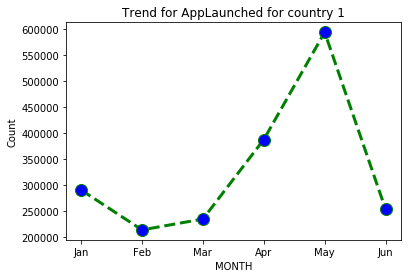

In [14]:
plt.plot(['Jan','Feb','Mar','Apr','May','Jun'], [289863,213031,234052,387127,593840,253048], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.title('Trend for AppLaunched for country 1')
plt.xlabel('MONTH')
plt.ylabel('Count')

# Registration Dataset

In [15]:
data2 = pd.read_csv(r"D:\Capstone\Data\Registration.csv")
data2.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed


In [16]:
data2.shape

(329579, 9)

In [17]:
data2['Start_Time_hr'] = data2['Minute_Of_Day']//60
data2['Start_Time_min'] = data2['Minute_Of_Day']%60
data2['Start_Time_sec'] = data2['Second']
data2 = data2.drop(columns = 'Minute_Of_Day')
data2 = data2.drop(columns = 'Second')
data2['Start_Time_hr'] = data2['Start_Time_hr'].apply(lambda x: str(x).zfill(2))
data2['Start_Time_min'] = data2['Start_Time_min'].apply(lambda x: str(x).zfill(2) )
data2['Start_Time_sec'] =data2['Start_Time_sec'].apply(lambda x: str(x).zfill(2))
data2['time'] = data2['Start_Time_hr'] + str(':') + data2['Start_Time_min'] + str(':') + data2['Start_Time_sec']
data2 = data2.drop(columns = ['Start_Time_hr','Start_Time_min','Start_Time_sec'])
data2.head(5)

,UserId,Date,State,Country,Device,OS,Status,time
0,d168e2b924124feaad13eae44a68fce9,20170106,35,1,1,2,Complete,00:00:08
1,deed7490952a6746610ee2ee9fd219b7,20170106,7,40,1,1,Completed,00:00:08
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,35,1,1,2,Complete,00:00:28
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,39,1,1,1,Completed,00:00:52
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,38,1,1,1,Not Completed,00:00:52


# Countplot of status of registration

Completed        228971
Not Completed    100608
Name: Status, dtype: int64


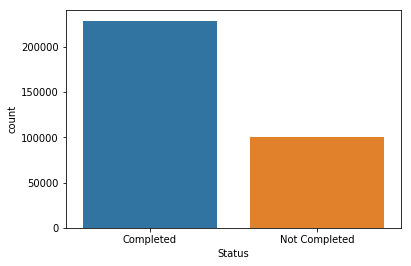

In [18]:
data2.Status = data2.Status.replace({"Complete":"Completed"})
print(data2.Status.value_counts())
sns.countplot(data2['Status'])

In [19]:
data2['Date'] = data2['Date'].apply(lambda x:str(x)[0:4]+str('/') + str(x)[4:6] + str('/') + str(x)[6:8])
data2['Date'] = pd.to_datetime(data2['Date'])
data2.head(5)

,UserId,Date,State,Country,Device,OS,Status,time
0,d168e2b924124feaad13eae44a68fce9,2017-01-06,35,1,1,2,Completed,00:00:08
1,deed7490952a6746610ee2ee9fd219b7,2017-01-06,7,40,1,1,Completed,00:00:08
2,13d9f55e297d7d9c219fbe9085e1006c,2017-01-06,35,1,1,2,Completed,00:00:28
3,fccc2c0abf5afabf242a70df7b4c9e69,2017-01-06,39,1,1,1,Completed,00:00:52
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,2017-01-06,38,1,1,1,Not Completed,00:00:52


# Appuninstalled Dataset

In [18]:
data3 = pd.read_csv(r"../data/Appuninstalled.csv")
data3.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,0d5f4cc176a4e1c648a9b9b5dbe21d69,20170106,0,0,47,1,1,1
1,807018f66aba113be576eb8afa4ea4b6,20170106,0,0,6,1,1,1
2,763e66e04918d8b8a7e69a778f5a742a,20170106,1,0,41,1,1,1
3,4ee1ed456fa04fc42168a9787b54b549,20170106,1,0,37,1,1,1
4,253e758a5557f9de890e814d901f6906,20170106,6,0,46,40,1,1


In [15]:
data3.shape

(326684, 8)

# Merging appuninstalled and registration Dataset

In [19]:
def To_Date_Time(data):
    df3 = data
    df3['Start_Time_hr'] = df3['Minute_Of_Day']//60
    df3['Start_Time_min'] = df3['Minute_Of_Day']%60
    df3['Start_Time_sec'] = df3['Second']
    df3 = df3.drop(columns = 'Minute_Of_Day')
    df3 = df3.drop(columns = 'Second')
    df3['Start_Time_hr'] = df3['Start_Time_hr'].apply(lambda x: str(x).zfill(2))
    df3['Start_Time_min'] = df3['Start_Time_min'].apply(lambda x: str(x).zfill(2) )
    df3['Start_Time_sec'] =df3['Start_Time_sec'].apply(lambda x: str(x).zfill(2))
    df3['time'] = df3['Start_Time_hr'] + str(':') + df3['Start_Time_min'] + str(':') + df3['Start_Time_sec']
    df3['date-time'] = df3['Date'].apply(str) + ' ' + df3['time'].apply(str)
    df3['date-time'] = pd.to_datetime(df3['date-time'])
    df3.drop(columns = ['Date','time'],inplace = True)

    df3 = df3.drop(columns = ['Start_Time_hr','Start_Time_min','Start_Time_sec'])
    return df3

In [20]:
# data23 = pd.merge(data2, data3, on='UserId')
# data23['Date_y'] = data23['Date_y'].apply(lambda x:str(x)[0:4]+str('/') + str(x)[4:6] + str('/') + str(x)[6:8])
# data23['Date_y'] = pd.to_datetime(data23['Date_y'])
data3 = To_Date_Time(data3)
data3.head(5)

,UserId,State,Country,Device,OS,date-time
0,0d5f4cc176a4e1c648a9b9b5dbe21d69,47,1,1,1,2017-01-06 00:00:00
1,807018f66aba113be576eb8afa4ea4b6,6,1,1,1,2017-01-06 00:00:00
2,763e66e04918d8b8a7e69a778f5a742a,41,1,1,1,2017-01-06 00:01:00
3,4ee1ed456fa04fc42168a9787b54b549,37,1,1,1,2017-01-06 00:01:00
4,253e758a5557f9de890e814d901f6906,46,40,1,1,2017-01-06 00:06:00


In [21]:
data3.shape

(326684, 6)

In [22]:
data3['date-time'].dt.month.value_counts()

5    74124
1    66762
4    62648
2    49160
3    43252
6    30738
Name: date-time, dtype: int64

Text(0,0.5,'Count')

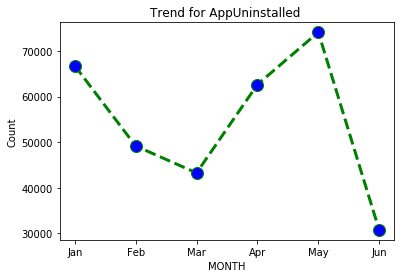

In [23]:
plt.plot(['Jan','Feb','Mar','Apr','May','Jun'], [66762,49160,43252,62648,74124,30738], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.title('Trend for AppUninstalled ')
plt.xlabel('MONTH')
plt.ylabel('Count')

# UTM Dataset

In [32]:
data4 = pd.read_csv(r"D:\Capstone\Data\UTMVisited.csv")
data4.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,66d4abf4f3b733c27591b3f47c85eff7,20170106,0,52,37,1,1,1
1,1a40d7e5b34131b097fac80cf982241b,20170106,0,56,40,1,1,1
2,b7b3c1ce773a13b52d39429e305ea615,20170106,1,16,35,1,1,1
3,3f486a89433a02b96ab13b16c82e39fd,20170106,1,32,35,1,1,1
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,1,32,38,1,1,1


In [33]:
data4['Date'] = data4['Date'].apply(lambda x:str(x)[0:4]+str('/') + str(x)[4:6] + str('/') + str(x)[6:8])
data4['Date'] = pd.to_datetime(data4['Date'])
data4['Start_Time_hr'] = data4['Minute_Of_Day']//60
data4['Start_Time_min'] = data4['Minute_Of_Day']%60
data4['Start_Time_sec'] = data4['Second']
data4.head(5)


,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Start_Time_hr,Start_Time_min,Start_Time_sec
0,66d4abf4f3b733c27591b3f47c85eff7,2017-01-06,0,52,37,1,1,1,0,0,52
1,1a40d7e5b34131b097fac80cf982241b,2017-01-06,0,56,40,1,1,1,0,0,56
2,b7b3c1ce773a13b52d39429e305ea615,2017-01-06,1,16,35,1,1,1,0,1,16
3,3f486a89433a02b96ab13b16c82e39fd,2017-01-06,1,32,35,1,1,1,0,1,32
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,2017-01-06,1,32,38,1,1,1,0,1,32


In [35]:
data4['Start_Time_hr'] = data4['Start_Time_hr'].apply(lambda x: str(x).zfill(2))
data4['Start_Time_min'] = data4['Start_Time_min'].apply(lambda x: str(x).zfill(2) )
data4['Start_Time_sec'] =data4['Start_Time_sec'].apply(lambda x: str(x).zfill(2))
data4['time'] = data4['Start_Time_hr'] + str(':') + data4['Start_Time_min'] + str(':') + data4['Start_Time_sec']b
data4.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Start_Time_hr,Start_Time_min,Start_Time_sec,time
0,66d4abf4f3b733c27591b3f47c85eff7,2017-01-06,0,52,37,1,1,1,00,00,52,00:00:52
1,1a40d7e5b34131b097fac80cf982241b,2017-01-06,0,56,40,1,1,1,00,00,56,00:00:56
2,b7b3c1ce773a13b52d39429e305ea615,2017-01-06,1,16,35,1,1,1,00,01,16,00:01:16
3,3f486a89433a02b96ab13b16c82e39fd,2017-01-06,1,32,35,1,1,1,00,01,32,00:01:32
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,2017-01-06,1,32,38,1,1,1,00,01,32,00:01:32


In [37]:
data4.drop(columns = ['Start_Time_hr','Start_Time_min','Start_Time_sec'],inplace = True)
data4.head(5)

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,time
0,66d4abf4f3b733c27591b3f47c85eff7,2017-01-06,0,52,37,1,1,1,00:00:52
1,1a40d7e5b34131b097fac80cf982241b,2017-01-06,0,56,40,1,1,1,00:00:56
2,b7b3c1ce773a13b52d39429e305ea615,2017-01-06,1,16,35,1,1,1,00:01:16
3,3f486a89433a02b96ab13b16c82e39fd,2017-01-06,1,32,35,1,1,1,00:01:32
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,2017-01-06,1,32,38,1,1,1,00:01:32


In [38]:
data4['Date'].dt.month.value_counts()

5    116383
4    100321
1     98052
3     67629
2     60636
6     52829
Name: Date, dtype: int64

Text(0, 0.5, 'Count')

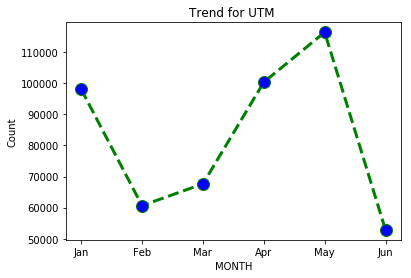

In [39]:
plt.plot(['Jan','Feb','Mar','Apr','May','Jun'], [98052,60636,67629,100321,116383,52829], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.title('Trend for UTM ')
plt.xlabel('MONTH')
plt.ylabel('Count')